In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Return a list of paths matching a pathname pattern.
# glob
from glob import glob
nomsfichiers =glob("Data2/*- Données Historiques.csv")

In [3]:
# appliquer une boucle for sur nomsfichiers
for nom in nomsfichiers:
    print(nom)

Data2\ADWYA - Données Historiques.csv
Data2\ASSAD - Données Historiques.csv
Data2\ATB - Données Historiques.csv
Data2\ATL - Données Historiques.csv
Data2\BH - Données Historiques.csv
Data2\BT - Données Historiques.csv
Data2\BTEI - Données Historiques.csv
Data2\CIL - Données Historiques.csv
Data2\CITY - Données Historiques.csv
Data2\DH - Données Historiques.csv
Data2\ECYCL - Données Historiques.csv
Data2\GIF - Données Historiques.csv
Data2\LSTR - Données Historiques.csv
Data2\MGR - Données Historiques.csv
Data2\MNP - Données Historiques.csv
Data2\OTH - Données Historiques.csv
Data2\SAH - Données Historiques.csv
Data2\SAMAA - Données Historiques.csv
Data2\SCB - Données Historiques.csv
Data2\SERVI - Données Historiques.csv
Data2\SFBT - Données Historiques.csv
Data2\SMG - Données Historiques.csv
Data2\SOKNA - Données Historiques.csv
Data2\SPDI - Données Historiques.csv
Data2\STAR - Données Historiques.csv
Data2\STB - Données Historiques.csv
Data2\STPIL - Données Historiques.csv
Data2\TAIR 

In [7]:
dfs = [pd.read_csv(f, thousands=',') for f in nomsfichiers]
dfs;

## -Data preparation- 

In [10]:
dfs = [pd.read_csv(f) for f in nomsfichiers]

##### 1-Régler le problème de  virgule (remplacer la virgule par un point). 
##### 2-Changer le type de la variable date en type datetime et la mettre comme indice 0.
##### 3-Créer une liste contenant les derniers changements.

In [11]:
new_list_data_frames = []
for entreprise in dfs:
    
    entreprise["Dernier"] = entreprise["Dernier"].str.replace(',', ".").astype(float)
    entreprise["Date"] = pd.to_datetime(entreprise["Date"], infer_datetime_format=True)
    entreprise = entreprise.set_index("Date")
    
    new_list_data_frames.append(entreprise)

In [12]:
new_list_data_frames;

In [13]:
# Construction d'une liste contenant seulement les prix de fermetures

listes_prix_fermetures = []
for entreprise in new_list_data_frames:
    close = entreprise["Dernier"].values
    listes_prix_fermetures.append(close)

In [27]:
#Créer une dataframe contenant les prix de fermeture
dataframe = pd.DataFrame(data = listes_prix_fermetures).T
dataframe.shape
dataframe;

In [17]:
#509 jours disponible dans notre base de donnée pour la premiere entreprise cotée en bourse (ADWYA).
new_list_data_frames[0].index.shape

(509,)

In [18]:
#Nommer les colonnes et créer une dataframe "data" contenant les prix de fermeture pour les 35 entreprises
nldf = new_list_data_frames
data = pd.concat([nldf[0]["Dernier"], 
                     nldf[1]["Dernier"],
                    nldf[2]["Dernier"],
                    nldf[3]["Dernier"],
                    nldf[4]["Dernier"],
                    nldf[5]["Dernier"],
                    nldf[6]["Dernier"],
                    nldf[7]["Dernier"],
                    nldf[8]["Dernier"],
                    nldf[9]["Dernier"],
                    nldf[10]["Dernier"],
                    nldf[11]["Dernier"],
                    nldf[12]["Dernier"],
                    nldf[13]["Dernier"],
                    nldf[14]["Dernier"],
                    nldf[15]["Dernier"],
                     nldf[16]["Dernier"],
                     nldf[17]["Dernier"],
                    nldf[18]["Dernier"],
                    nldf[19]["Dernier"],
                    nldf[20]["Dernier"],
                    nldf[21]["Dernier"],
                    nldf[22]["Dernier"],
                    nldf[23]["Dernier"],
                    nldf[24]["Dernier"],
                    nldf[25]["Dernier"],
                    nldf[26]["Dernier"],
                    nldf[27]["Dernier"],
                    nldf[28]["Dernier"],
                    nldf[29]["Dernier"],
                    nldf[30]["Dernier"],
                    nldf[31]["Dernier"],
                    nldf[32]["Dernier"],
                    nldf[33]["Dernier"],
                    nldf[34]["Dernier"]
                  ], join='outer', axis=1)

In [19]:
data.columns

Index(['Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier'],
      dtype='object')

In [20]:
data.shape

(600, 35)

-Suppression des lignes vides :

In [21]:
dm=data.drop(data.index[0:17],0)
dm;

In [22]:
data=dm.drop(dm.index[563:599],0)
data;

In [23]:
data;

##### - Il reste un problème lié aux noms d'entreprises :
*  Nommer les colonnes avec  les noms des entreprises :

In [17]:
nom

'Data\\XABYT - Données Historiques.csv'

In [18]:
nomsfichiers = glob("Data/*- Données Historiques.csv")

In [19]:
nomsfichiers;

In [20]:
x = nomsfichiers[0].replace("data2\\","")
x.replace(" - Données Historiques.csv","")

'Data\\ADWYA'

In [21]:
noms_entreprises = []
for i in range(len(nomsfichiers)):
    x = nomsfichiers[i].replace("Data\\","")
    x = x.replace(" - Données Historiques.csv","")
    noms_entreprises.append(x)

In [22]:
noms_entreprises

['ADWYA',
 'ASSAD',
 'ATB',
 'ATL',
 'BH',
 'BT',
 'BTEI',
 'CIL',
 'CITY',
 'DH',
 'ECYCL',
 'GIF',
 'LSTR',
 'MGR',
 'MNP',
 'OTH',
 'SAH',
 'SAMAA',
 'SCB',
 'SERVI',
 'SFBT',
 'SMG',
 'SOKNA',
 'SPDI',
 'STAR',
 'STB',
 'STPIL',
 'TAIR',
 'TGH',
 'TINV',
 'TLNET',
 'TLS',
 'TVAL',
 'UBCI',
 'XABYT']

In [23]:
data.columns = noms_entreprises

In [24]:
data ;

##### - Détection des valeurs manquantes :

In [25]:
data.isna().sum()

ADWYA     54
ASSAD     51
ATB       66
ATL      108
BH        55
BT        49
BTEI     246
CIL      279
CITY     104
DH        83
ECYCL     48
GIF       75
LSTR     101
MGR       58
MNP       75
OTH       48
SAH       47
SAMAA     63
SCB      274
SERVI    102
SFBT      46
SMG      273
SOKNA    119
SPDI     274
STAR     231
STB       54
STPIL     91
TAIR      66
TGH       82
TINV     372
TLNET     46
TLS      146
TVAL     199
UBCI     339
XABYT    253
dtype: int64

In [26]:
entreprises_donnee_manquantes = data.columns[ data.isna().sum() != 0 ]
entreprises_donnee_manquantes


Index(['ADWYA', 'ASSAD', 'ATB', 'ATL', 'BH', 'BT', 'BTEI', 'CIL', 'CITY', 'DH',
       'ECYCL', 'GIF', 'LSTR', 'MGR', 'MNP', 'OTH', 'SAH', 'SAMAA', 'SCB',
       'SERVI', 'SFBT', 'SMG', 'SOKNA', 'SPDI', 'STAR', 'STB', 'STPIL', 'TAIR',
       'TGH', 'TINV', 'TLNET', 'TLS', 'TVAL', 'UBCI', 'XABYT'],
      dtype='object')

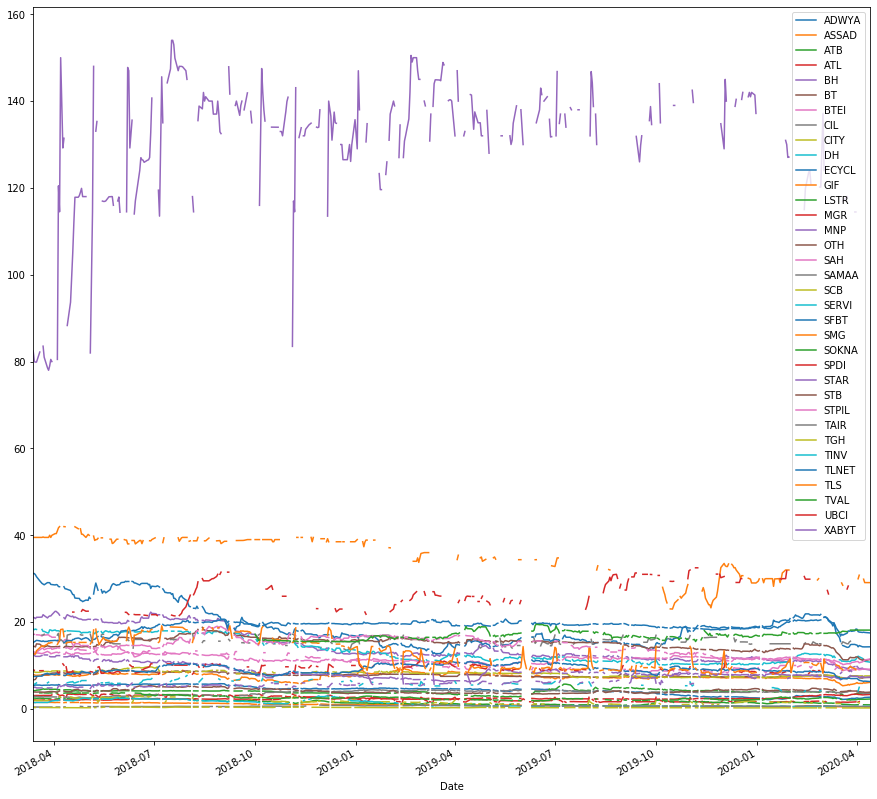

In [27]:
for entreprise in entreprises_donnee_manquantes:
    data.loc[:,entreprise].plot(figsize=(15,15),legend=True);

##### -Remplissage des valeurs manquantes : 

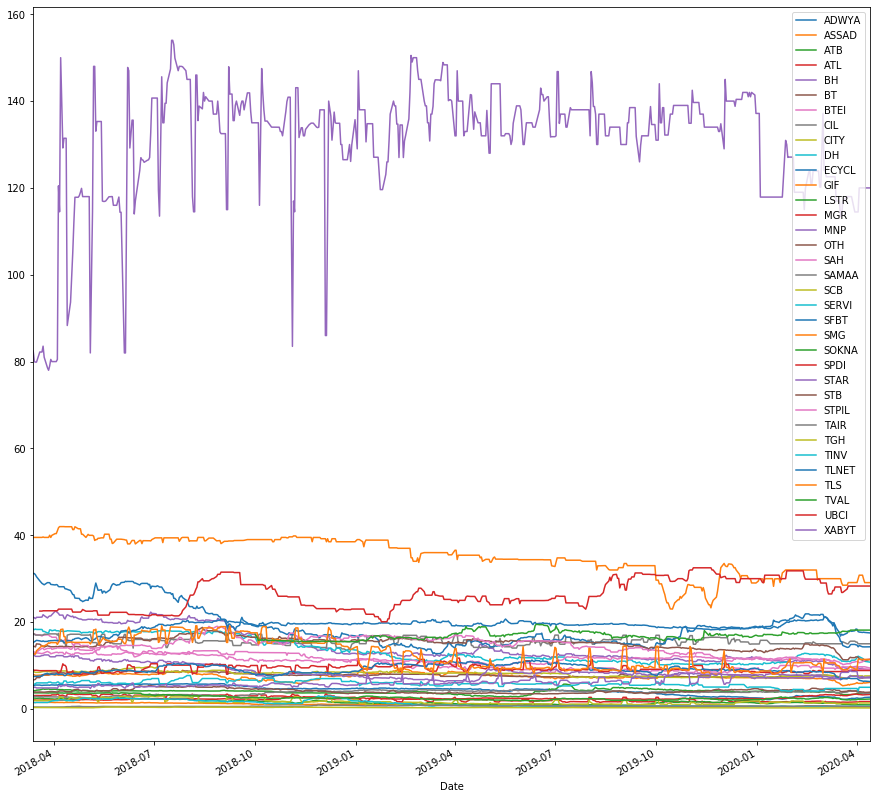

In [28]:
for entreprise in entreprises_donnee_manquantes:
    data.fillna(method = "ffill").loc[:,entreprise].plot(figsize=(15,15),legend=True);
    #data.fillna(method = "bfill").loc[:,entreprise].plot(figsize=(15,15),legend=True);

In [24]:
#Remplir les valeurs vides par les valeurs suivantes
data = data.fillna(method = "ffill")
# On remplit les valeurs vides par les valeurs précédentes
data = data.fillna(method = "bfill")

In [25]:
# Vérification que le dataframe ne contient plus de données manquantes
data.isna().sum().sum()

0

#### -Calcul du rendement : 

In [32]:
#Calcul de rendement pour chaque entreprise
rendement = data.pct_change().mean() * 252
rendement;

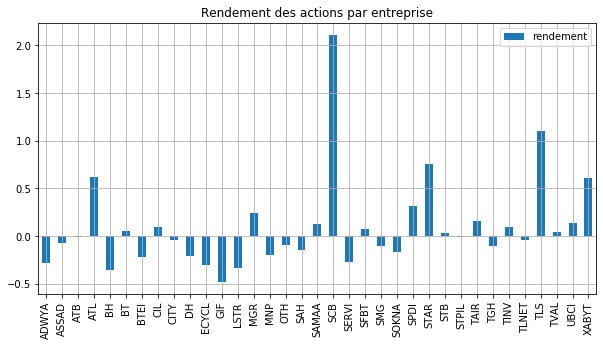

In [33]:
rendement = pd.DataFrame(rendement)
rendement.columns = ["rendement"]
rendement.plot.bar(figsize =(10,5), grid = True, title = "Rendement des actions par entreprise");


##### --> SCB a le meilleur rendement .

#### - Calcul de volatilité :

In [34]:
volatilite = data.pct_change().std() * np.sqrt(252)
rendement["volatilite"] = volatilite
rendement;

##### -Corrélation entre rendement et volatilité:

In [35]:
rendement.corr()

,rendement,volatilite
rendement,1.000000,0.894231
volatilite,0.894231,1.000000


#### -> Il existe un lien étroit entre le potentiel de gain d'un investissement et son niveau de risque,d'où le terme de «couple rendement -risque». Ainsi, plus le risque est élevé ou bien la fluctuation du cours de l'action plus l'espérance de gain est élevé ; et inversement, s’il est faible, le potentiel de gain l’est également.
#### -> Donc , on constate qu'il existe une forte corrélation entre le rendement et la volatilité , Plus une action sera « volatile » et plus son cours sera sensible aux bonnes et aux mauvaises nouvelles concernant l’entreprise ou les marchés. Une volatilité élevée signifie que le cours varie de façon importante et donc que le risque associé à la valeur est important. 

In [36]:
#Transformation du dataframe en numpy.array
X = np.asarray([np.asarray(rendement['rendement']),np.asarray(rendement['volatilite'])]).T
X;

#### -Classification des actions : KMeans

In [37]:
from sklearn.cluster import KMeans

In [37]:
#KMeans?

In [38]:
inertie = []
for k in range(2,36):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    inertie.append(k_means.inertia_)

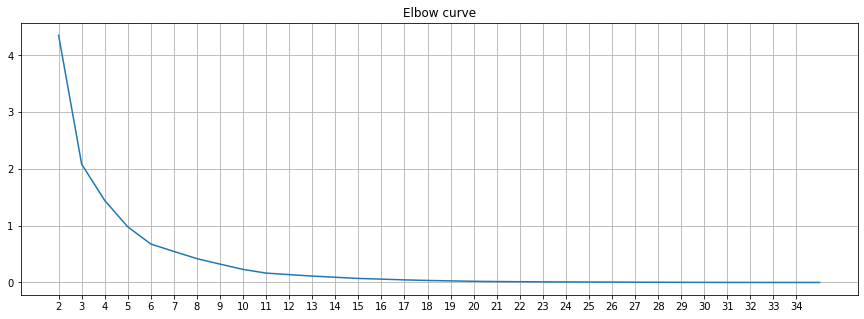

In [39]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2,36), inertie)
plt.xticks(range(2,35))
plt.grid(True)
plt.title('Elbow curve');
# Le elbow curve nous permet d'avoir une idée sur le nombre de classe proposé par la méthode Kmeans.

#### ->Kmeans propose 5 classes :
##### Kmeans divise les entreprises en 5 classes selon le rendement et la volatilité 

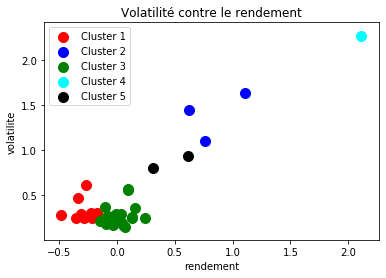

In [40]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =5 , init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('volatilite')
plt.xlabel('rendement')
plt.title("Volatilité contre le rendement")
plt.legend()
plt.show()

In [41]:
txt = rendement.index

In [47]:
txt

Index(['ADWYA', 'ASSAD', 'ATB', 'ATL', 'BH', 'BT', 'BTEI', 'CIL', 'CITY', 'DH',
       'ECYCL', 'GIF', 'LSTR', 'MGR', 'MNP', 'OTH', 'SAH', 'SAMAA', 'SCB',
       'SERVI', 'SFBT', 'SMG', 'SOKNA', 'SPDI', 'STAR', 'STB', 'STPIL', 'TAIR',
       'TGH', 'TINV', 'TLNET', 'TLS', 'TVAL', 'UBCI', 'XABYT'],
      dtype='object')

##### - Divisier les entreprises par classe:

In [42]:
rdt = pd.DataFrame(rendement.index) # the dataframe structure allow concatenation
cluster_labels = pd.DataFrame(kmeans.labels_)
rdtClusters = pd.concat([rdt, cluster_labels],axis = 1)
rdtClusters.columns = ['entreprise','Cluster']

In [43]:
rdtClusters;

 Division du Dataframe en 3 différentes classes :


* Recuparation des entreprises selon la classe :  

In [44]:
Class1 = rdtClusters[rdtClusters.Cluster == 0].entreprise
Class2 = rdtClusters[rdtClusters.Cluster == 1].entreprise
Class3 = rdtClusters[rdtClusters.Cluster == 2].entreprise
Class4 = rdtClusters[rdtClusters.Cluster == 3].entreprise
Class5 = rdtClusters[rdtClusters.Cluster == 4].entreprise



* Transformation en liste :


In [45]:
list_Class1 = Class1.values.tolist()
list_Class2 = Class2.values.tolist()
list_Class3 = Class3.values.tolist()
list_Class4 = Class4.values.tolist()
list_Class5 = Class5.values.tolist()
List_ClassN = list_Class2 + list_Class4 + list_Class5
    

list_Class3
    


['ASSAD',
 'ATB',
 'BT',
 'CIL',
 'CITY',
 'MGR',
 'OTH',
 'SAH',
 'SAMAA',
 'SFBT',
 'SMG',
 'STB',
 'STPIL',
 'TAIR',
 'TGH',
 'TINV',
 'TLNET',
 'TVAL',
 'UBCI']

* Creation des dataframes selon 3 classes :


In [49]:
#Creation des dataframes selon 3 classes :
df_Class1 =data.drop(data.columns.difference(list_Class1), axis=1)
df_Class2 =data.drop(data.columns.difference(List_ClassN), axis=1)
df_Class3 =data.drop(data.columns.difference(list_Class3), axis=1)



#### -Calcul du rendement des différentes classes : 

In [50]:
rendement1 = df_Class1.pct_change().mean() * 252
rendement2 = df_Class2.pct_change().mean() * 252
rendement3 = df_Class3.pct_change().mean() * 252


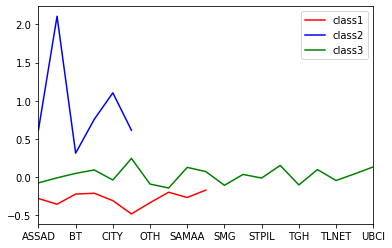

In [51]:
r1=rendement1.plot(c='red',label="class1")
r2=rendement2.plot(c='blue',label="class2")
r3=rendement3.plot(c='green',label="class3")
plt.legend()
plt.show()

-->On constate ici que le rendement de la 1ere classe est le moins important  or que le rendement de la classe2(2+5+4) et le plus important .

#### -Calcul de la volatilite des differentes classes : 

In [52]:
volatilite1 = df_Class1.pct_change().std() * np.sqrt(252)
volatilite2 = df_Class2.pct_change().std() * np.sqrt(252)
volatilite3 = df_Class3.pct_change().std() * np.sqrt(252)


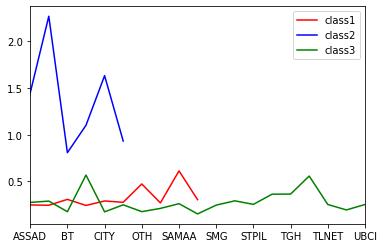

In [53]:
v1=volatilite1.plot(c='red',label="class1")
v2=volatilite2.plot(c='blue',label="class2")
v3=volatilite3.plot(c='green',label="class3")
plt.legend()
plt.show()

-->On remarque ici que la volatilité de 2eme classe est la plus grande en contre partie la volatilité de 1er classe est la moins importante.

#### -Creation de dataFrame rendement volatilite pour chaque classe :

In [54]:
X1 = pd.concat([rendement1 , volatilite1], axis =1)
X1.columns = ["Rendement", "Volatilite"]
X2 = pd.concat([rendement2 , volatilite2], axis =1)
X2.columns = ["Rendement", "Volatilite"]
X3 = pd.concat([rendement3 , volatilite3], axis =1)
X3.columns = ["Rendement", "Volatilite"]


On a 3 classes, et chaque classe contient des actions. On choisit les meilleures actions de chaque classe pour former le/les portefeuille(s) optimal(s) .

##### -Représentation du couple Rendement-Volatilite des actions pour chaques classe : 

##### Classe 1 :


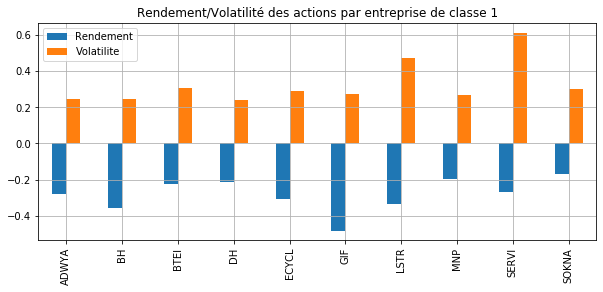

In [55]:
X1.plot.bar(figsize =(10,4), grid = True, title = "Rendement/Volatilité des actions par entreprise de classe 1" );

-->La totalité des actions de la  premiére classe ont des rendements négatives et une volatilité importante.

##### -Matrice de corrélation du rendement de la classe 1 : 

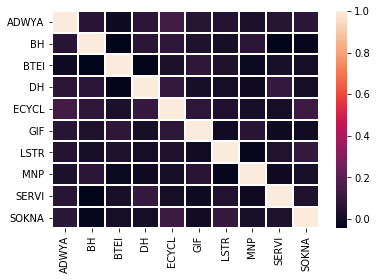

In [56]:
rendement_cl1 = df_Class1.pct_change()
RenCorrMatrix=rendement_cl1.corr()
sns.heatmap(RenCorrMatrix, linewidths=1);


##### --> Une corrélation proche de 0 indique l'absence de relation linéaire entre les actions de 1er classe.

##### Classe 2 :


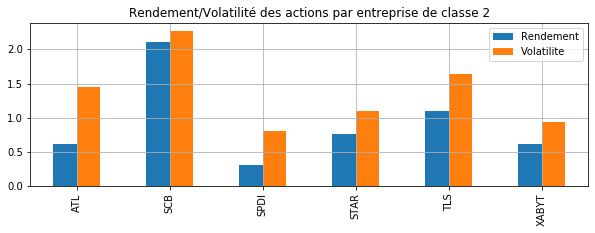

In [57]:
X2.plot.bar(figsize =(10,3), grid = True, title = "Rendement/Volatilité des actions par entreprise de classe 2" );

##### -->Les rendements et les volatilités des actions de 2eme classe sont positives.

##### - Matrice de corrélation du rendement de la classe 2 : 

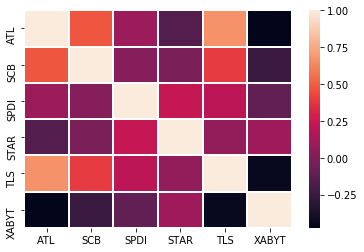

In [58]:
rendement_cl2 = df_Class2.pct_change()
RenCorrMatrix_2=rendement_cl2.corr()
sns.heatmap(RenCorrMatrix_2, linewidths=1);


-->La matrice de corrélation nous montre une faible corrélation entre les actions de 2eme classe.

##### Classe 3 :


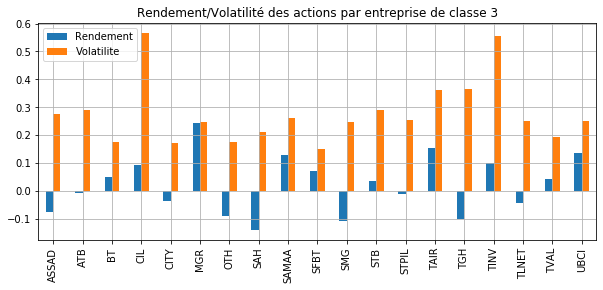

In [59]:
X3.plot.bar(figsize =(10,4), grid = True, title = "Rendement/Volatilité des actions par entreprise de classe 3" );

 --> Selon la représentation graphique de rendement - volatilité , les actions de 3eme classe ont les meilleurs rendements par rapport aux autres portefeuille .

##### -Matrice de corrélation du rendement de la classe 3: 

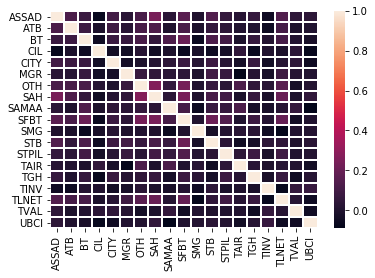

In [60]:
rendement_cl3 = df_Class3.pct_change()
RenCorrMatrix_3=rendement_cl3.corr()
sns.heatmap(RenCorrMatrix_3, linewidths=1);


 -->On constate une indépendance linéaire presque totale entre les actions de 3eme classe(absence de corrélation).

* Pour concevoir les portefeuilles optimales , on choisira manuellement et à l'aide des graphs et des calculs faits les meilleurs actions selon les critéres Rendement-Volatilité.
* On a éliminé  la totalité des actions de 1er classe car elles ont des rendement négatives.

#### - First portfolio : Classe2

In [61]:
ATL = df_Class2['ATL']
SCB = df_Class2['SCB']
SPDI = df_Class2['SPDI']
STAR = df_Class2['STAR']
TLS = df_Class2['TLS']
XABYT = df_Class2['XABYT']
ATL = pd.DataFrame(ATL)
SCB = pd.DataFrame(SCB)
SPDI = pd.DataFrame(SPDI)
STAR = pd.DataFrame(STAR)
TLS = pd.DataFrame(TLS)
XABYT = pd.DataFrame(XABYT)
ATL.columns = ['Adj. Close']
SCB.columns = ['Adj. Close']
SPDI.columns = ['Adj. Close']
STAR.columns = ['Adj. Close']
TLS.columns = ['Adj. Close']
XABYT.columns = ['Adj. Close']

In [63]:
for stock_def in (ATL,SCB,SPDI,STAR,TLS,XABYT):
    stock_def['Normed Return'] = stock_def['Adj. Close']/stock_def.iloc[0]['Adj. Close']

In [64]:
for stock_def, allo in zip((ATL,SCB,SPDI,STAR,TLS,XABYT),[.1,.3,.1,.2,.2,.1]):
    stock_def['Allocation'] = stock_def['Normed Return']*allo
     

*On suppose qu'on va investir 10.000 DT pour ce portefeuille :* 

In [65]:
for stock_def in (ATL,SCB,SPDI,STAR,TLS,XABYT):
    stock_def['Position Values'] = stock_def['Allocation']*10000

In [66]:
all_ent = [ATL['Position Values'],SCB['Position Values'],SPDI['Position Values'],STAR['Position Values'],TLS['Position Values'],XABYT['Position Values']]
portfolio_val = pd.concat(all_ent, axis = 1)
portfolio_val.columns = ['ATL pos','SCB pos','SPDI pos','STAR pos','TLS pos','XABYT pos']
portfolio_val['Total position'] = portfolio_val.sum(axis = 1)
portfolio_val.head()

,ATL pos,SCB pos,SPDI pos,STAR pos,TLS pos,XABYT pos,Total position
Date,,,,,,,
2018-03-13,1000.000000,3000.000000,1000.000000,2000.000000,2000.000000,1000.000000,10000.000000
2018-03-14,990.322581,3030.769231,988.888889,1940.570042,1970.358814,1000.000000,9920.909557
2018-03-15,996.774194,3030.769231,988.888889,1937.659187,1970.358814,1000.000000,9924.450315
2018-03-16,996.774194,3015.384615,988.888889,1937.659187,2088.923557,971.830986,9999.461428
2018-03-19,990.322581,3015.384615,977.777778,1993.935719,2195.007800,971.830986,10144.259479


*  On a supposé que l'investissement initial est I0=10000 et d'aprés le résultat , les allocations trouvées sont les suivantes:*

*10% ATL/
30% SCB/
10% SPDI/
20% STAR/
20% TLS/
10% XABYT*

##### -Représentation graphique du daily return  du  portfeuille composé de 6 actions de 2 eme classe.

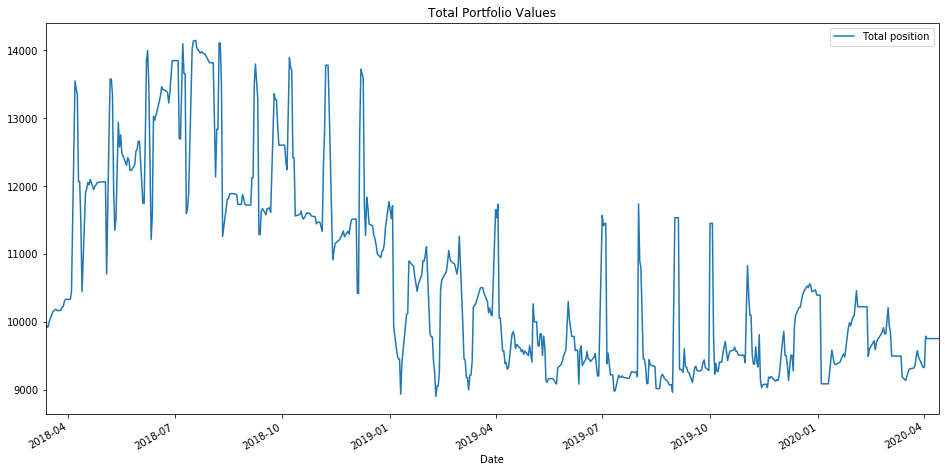

In [67]:
portfolio_val['Total position'].plot(figsize = (16,8))
plt.title('Total Portfolio Values')
plt.legend();

#### - Cette courbe représente les gains journaliers de 1er portefeuille  pour chaque jour reliés entre eux par une ligne.L'axe horizontal représente le temps et l'axe vertical celui des cours.

-> La courbe de  daily return ou bien le gain journalier de ce portfeuille est en baisse le long de période d'acquisition . 

-> Le 13/04/2020(date fin) le daily return est à 7892.358113 , donc investir dans ce portefeuille apportera  une perte d'argent de  2107.641887 TND .

#### Second portfolio : Classe 3

In [68]:
MGR = df_Class3['MGR']
SAMAA = df_Class3['SAMAA']
SFBT = df_Class3['SFBT']
TAIR = df_Class3['TAIR']
UBCI = df_Class3['UBCI']
CIL = df_Class3['CIL']
MGR = pd.DataFrame(MGR)
SAMAA = pd.DataFrame(SAMAA)
SFBT = pd.DataFrame(SFBT)
TAIR = pd.DataFrame(TAIR)
UBCI = pd.DataFrame(UBCI)
CIL = pd.DataFrame(CIL)
MGR.columns = ['Adj. Close']
SAMAA.columns = ['Adj. Close']
SFBT.columns = ['Adj. Close']
TAIR.columns = ['Adj. Close']
UBCI.columns = ['Adj. Close']
CIL.columns = ['Adj. Close']

In [69]:
for sto_def in (MGR,SAMAA,SFBT,TAIR,UBCI,CIL):
    sto_def['Normed Return'] = sto_def['Adj. Close']/sto_def.iloc[0]['Adj. Close']

In [70]:
for sto_def, allo in zip(((MGR,SAMAA,SFBT,TAIR,UBCI,CIL)),[.3,.2,.15,.1,.15,.1]):
    sto_def['Allocation'] = sto_def['Normed Return']*allo

In [71]:
#On suppose qu'on va investir 10.000 DT pour ce portefeuille :
for sto_def in (MGR,SAMAA,SFBT,TAIR,UBCI,CIL):
    sto_def['Position Values'] = sto_def['Allocation'] * 10000

In [72]:
all_ent2 = [MGR['Position Values'],SAMAA['Position Values'],SFBT['Position Values'],TAIR['Position Values'],UBCI['Position Values'],CIL['Position Values']]
portfolio_val2 = pd.concat(all_ent2, axis = 1)
portfolio_val2.columns = ['MGR pos','SAMAA pos','SFBT pos','TAIR pos','UBCI pos','CIL pos']
portfolio_val2['Total position'] = portfolio_val2.sum(axis = 1)
portfolio_val2.head()

,MGR pos,SAMAA pos,SFBT pos,TAIR pos,UBCI pos,CIL pos,Total position
Date,,,,,,,
2018-03-13,3000.000000,2000.000000,1500.000000,1000.000000,1500.0,1000.000000,10000.000000
2018-03-14,2985.436893,1986.301370,1519.646365,955.555556,1500.0,1000.000000,9946.940184
2018-03-15,2985.436893,1986.301370,1533.398821,977.777778,1500.0,983.796296,9966.711158
2018-03-16,2898.058252,1952.054795,1551.080550,955.555556,1500.0,983.796296,9840.545449
2018-03-19,2956.310680,1904.109589,1539.292731,933.333333,1500.0,983.796296,9816.842629


*  On a supposé que l'investissement initial est I0=10000 et d'aprés le résultat , les allocations trouvées pour ce portefeuille sont les suivantes:*

*30% MGR/
*20% SAMAA/
*15% SFBT/
*10% TAIR/
*15% UBCI/
*10% CIL*

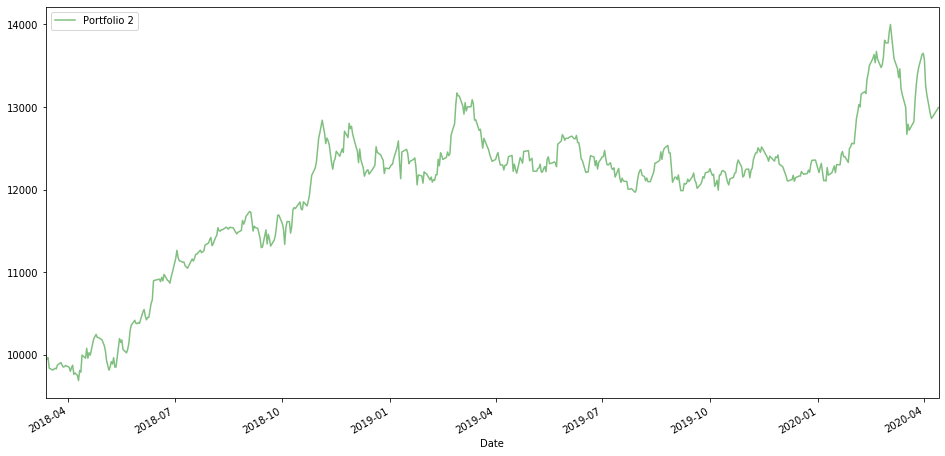

In [73]:
portfolio_val2['Total position'].plot(figsize = (16,8), color = 'green', label = 'Portfolio 2' ,alpha = 0.5)
plt.legend();     

-> La courbe de daily return ou bien le gain journalier de 2eme portfeuille est en hausse le long de periode d'acquisition.

-> Le 13/04/2020(date fin) le daily return est à 13348.173148 .


*Investir dans ce portefeuille va apporter un gain de 3348.173148 TND à la fin de période de détention.

*Comparaison between the two portfolios with an initial investment of 10000 dt*

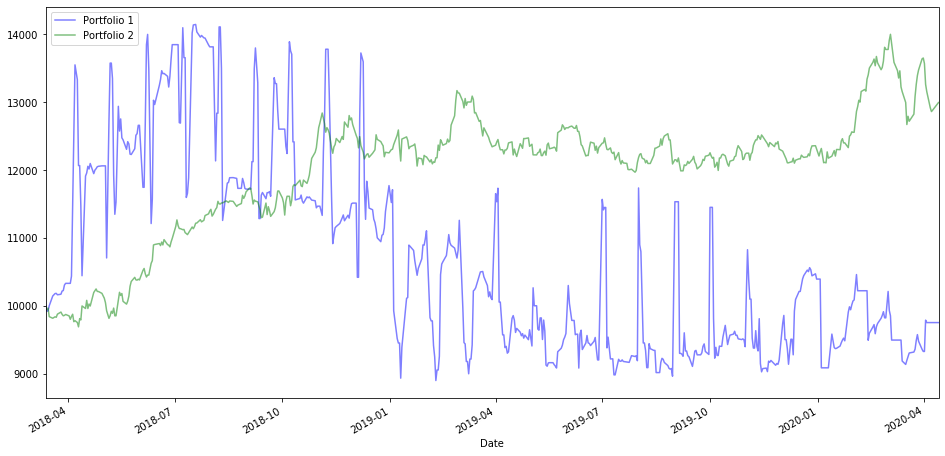

In [74]:
portfolio_val['Total position'].plot(color = 'blue', label = 'Portfolio 1', alpha = 0.5)
portfolio_val2['Total position'].plot(figsize = (16,8), color = 'green', label = 'Portfolio 2' ,alpha = 0.5)
plt.legend();

### -D'aprés la répresentation graphique du daily return de chaque portefeuille ,On remarque que la courbe de 2eme portefeuille suit une tendance haussiere et ne cesse d’augmenter par rapport à la courbe de 1er portefeuille .Donc d'aprés ce résultat on conseille d'investir dans le 2eme portefeuille. 

#### Sharpe ratio for Portfolio1

In [75]:
portfolio_val['Daily returns'] = portfolio_val['Total position'].pct_change(1)

In [76]:
portfolio_val['Daily returns'].mean()

0.0010332115817259244

In [77]:
portfolio_val['Daily returns'].std()

0.04703084887478027

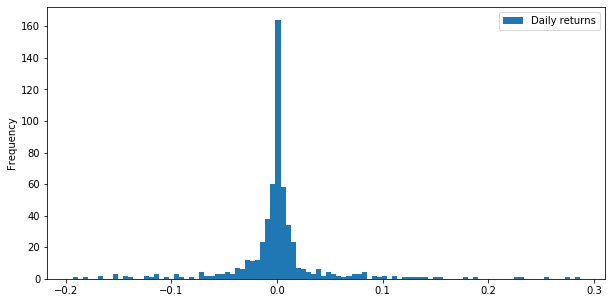

In [78]:
portfolio_val['Daily returns'].plot(kind = 'hist', bins = 100, figsize = (10,5))
plt.legend();

-> le daily return de 1er portefeuille tourne autour de 0 , son intervalle est entre [-0.1 , 0.1] qui est un intervalle trop étroit .

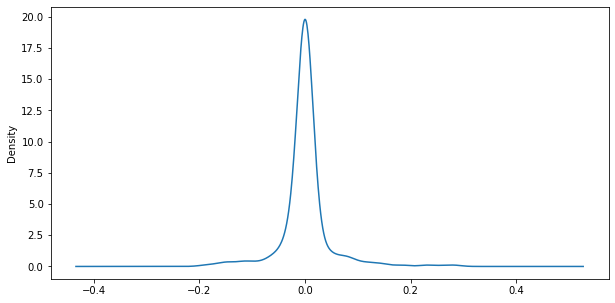

In [79]:
portfolio_val['Daily returns'].plot(kind = 'kde', figsize = (10,5));

In [80]:
cumulative_return = 100 * (portfolio_val['Total position'][-1]/portfolio_val['Total position'][0]-1)

In [81]:
cumulative_return

-2.471129229963076

In [83]:
portfolio_val['Total position'][-1] #C'est à dire que si je parts avec 10000dt, je finis avec 9752.887077003692

9752.887077003692

In [118]:
#We suppose that free risk rate = 0 percent

In [84]:
SR = portfolio_val['Daily returns'].mean()/ portfolio_val['Daily returns'].std()
SR

0.021968805718919775

#### Annualised Sharpe Ratio 1 : 

In [86]:
ASR = (252**0.5)*SR
ASR

0.34874397920013167

--> le ratio de Sharpe de 1er portefeuille est <1, le portefeuille a une performance moindre que celle du placement sans risque. Il ne faut pas investir dedans.

#### sharpe ratio for portfolio 2

In [87]:
portfolio_val2['Daily returns'] = portfolio_val2['Total position'].pct_change(1)

In [88]:
portfolio_val2['Daily returns'].mean()

0.000493532004584207

In [89]:
portfolio_val2['Daily returns'].std()

0.007410870973619886

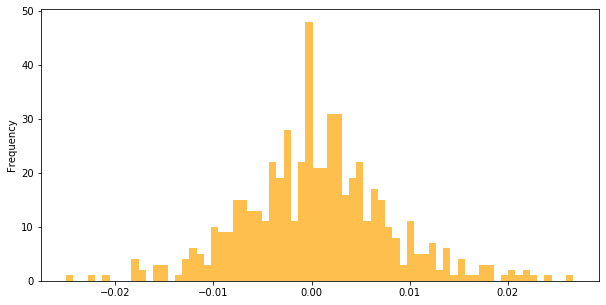

In [90]:
portfolio_val2['Daily returns'].plot(color = 'orange', kind = 'hist', bins = 70, figsize = (10,5), alpha = 0.7);

-> le daily return de 2eme portefeuille se situe dans un  intervalle de [-0.02 , 0.02] .

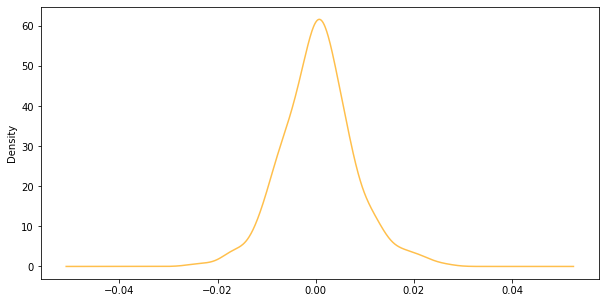

In [91]:
portfolio_val2['Daily returns'].plot(color = 'orange', kind = 'kde',figsize = (10,5), alpha = 0.7);

In [92]:
cumulative_return2 = 100 * (portfolio_val2['Total position'][-1]/portfolio_val2['Total position'][0]-1)
cumulative_return2

29.94194093924756

In [93]:
portfolio_val2['Total position'][-1] #C'est à dire que si je parts avec 10000dt, je finis avec 13348.173148226853

12994.194093924756

In [94]:
#We suppose that free risk rate = 0 percent

In [95]:
SR2 = portfolio_val2['Daily returns'].mean()/ portfolio_val2['Daily returns'].std()
SR2

0.06659568171420184

#### Annualised Sharpe Ratio 2 :

In [96]:
ASR2 = (252**0.5)*SR2
ASR2

1.0571736732395383

Le ratio de Sharpe de 2eme portefeuille est >1, le portefeuille a une performance supérieur à celle du placement au taux sans risque.Plus le ratio de Sharpe est élevé, plus l'investissement est performant.

#### Comparaison between the two portfolio's Daily returns frequency : 

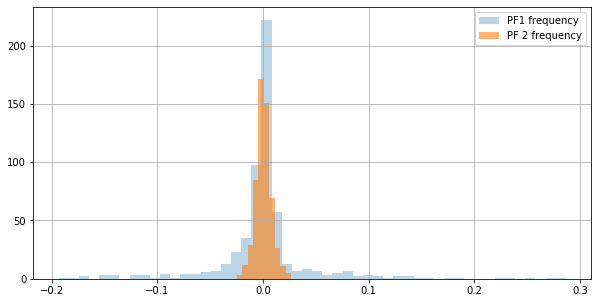

In [97]:
portfolio_val['Daily returns'].hist(bins = 50,figsize = (10,5), alpha = 0.3, label = 'PF1 frequency')
portfolio_val2['Daily returns'].hist(figsize = (10,5), alpha = 0.6, label = 'PF 2 frequency')
plt.legend();


*l'intervalle de daily return de 2eme portefeuille est plus large . les possibilités de gain sont plus importantes.

#### Portfolio optimization : les actions de 3eme classe (2eme portfeuille)

In [98]:
MGR = df_Class3['MGR']
SAMAA = df_Class3['SAMAA']
SFBT = df_Class3['SFBT']
TAIR = df_Class3['TAIR']
UBCI = df_Class3['UBCI']
CIL = df_Class3['CIL']
MGR = pd.DataFrame(MGR)
SAMAA = pd.DataFrame(SAMAA)
SFBT = pd.DataFrame(SFBT)
TAIR = pd.DataFrame(TAIR)
UBCI = pd.DataFrame(UBCI)
CIL = pd.DataFrame(CIL)
MGR.columns = ['Adj. Close']
SAMAA.columns = ['Adj. Close']
SFBT.columns = ['Adj. Close']
TAIR.columns = ['Adj. Close']
UBCI.columns = ['Adj. Close']
CIL.columns = ['Adj. Close']

MGR = MGR.drop(['Normed Return','Position Values','Allocation'], axis = 1)
SAMAA = SAMAA.drop(['Normed Return','Position Values','Allocation'], axis = 1)
SFBT = SFBT.drop(['Normed Return','Position Values','Allocation'], axis = 1)
TAIR = TAIR.drop(['Normed Return','Position Values','Allocation'], axis = 1)
UBCI = UBCI.drop(['Normed Return','Position Values','Allocation'], axis = 1)
CIL = CIL.drop(['Normed Return','Position Values','Allocation'], axis = 1)

In [101]:
stocks = pd.concat([MGR,SAMAA,SFBT,TAIR,UBCI,CIL], axis = 1)
stocks.columns = ['MGR','SAMAA','SFBT','TAIR','UBCI','CIL']
stocks.head()

,MGR,SAMAA,SFBT,TAIR,UBCI,CIL
Date,,,,,,
2018-03-13,2.06,2.92,15.27,0.45,22.53,17.28
2018-03-14,2.05,2.90,15.47,0.43,22.53,17.28
2018-03-15,2.05,2.90,15.61,0.44,22.53,17.00
2018-03-16,1.99,2.85,15.79,0.43,22.53,17.00
2018-03-19,2.03,2.78,15.67,0.42,22.53,17.00


In [102]:
stocks.pct_change(1).mean()

MGR      0.000971
SAMAA    0.000506
SFBT     0.000288
TAIR     0.000610
UBCI     0.000532
CIL      0.000374
dtype: float64

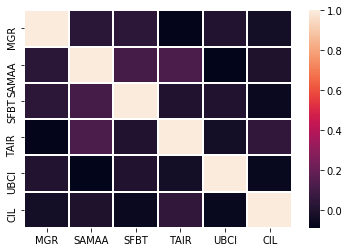

In [103]:
RenCorrMatrix_3=stocks.pct_change(1).corr()
sns.heatmap(RenCorrMatrix_3, linewidths=1); #Pour montrer qu'il y'a pas de correlation entre les rendements des differentes actions 

##### -->On constate une indépendance linéaire  entre les actions de 2eme portefeuille(absence de corrélation entres les actions).

In [104]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,MGR,SAMAA,SFBT,TAIR,UBCI,CIL
Date,,,,,,
2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-14,-0.004866,-0.006873,0.013013,-0.045462,0.0,0.000000
2018-03-15,0.000000,0.000000,0.009009,0.022990,0.0,-0.016336
2018-03-16,-0.029705,-0.017392,0.011465,-0.022990,0.0,0.000000
2018-03-19,0.019901,-0.024868,-0.007629,-0.023530,0.0,0.000000


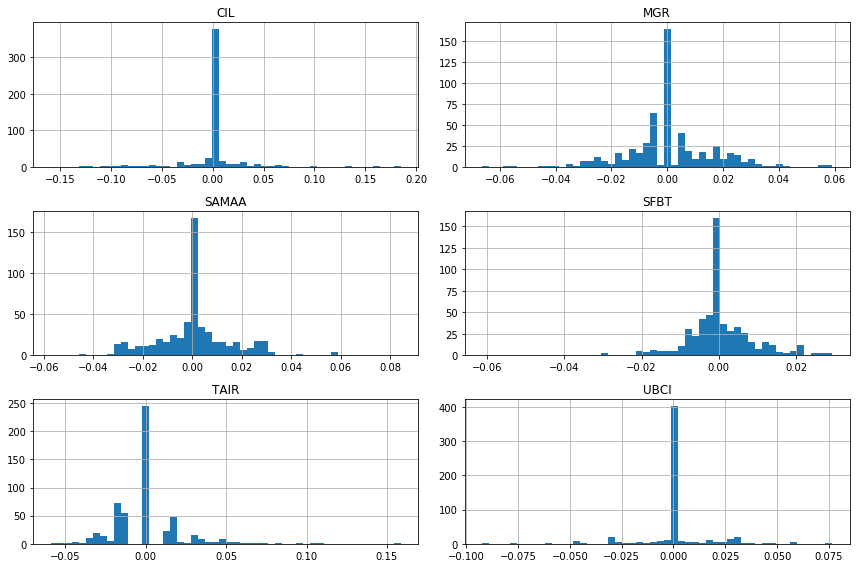

In [105]:
log_ret.hist(bins = 50, figsize = (12,8))
plt.tight_layout()

* Représentation du daily return pour chaque entreprise de 2eme portefeuille .

In [106]:
log_ret.mean()

MGR      0.000849
SAMAA    0.000373
SFBT     0.000243
TAIR     0.000357
UBCI     0.000406
CIL     -0.000252
dtype: float64

In [107]:
log_ret.cov() * 252

,MGR,SAMAA,SFBT,TAIR,UBCI,CIL
MGR,0.061381,0.001961,0.001481,-0.007704,0.000537,-0.004470
SAMAA,0.001961,0.067297,0.004258,0.011572,-0.005913,-0.000703
SFBT,0.001481,0.004258,0.022874,0.000281,0.000177,-0.005106
TAIR,-0.007704,0.011572,0.000281,0.126156,-0.002728,0.009917
UBCI,0.000537,-0.005913,0.000177,-0.002728,0.063792,-0.009787
CIL,-0.004470,-0.000703,-0.005106,0.009917,-0.009787,0.313631


In [108]:
print(stocks.columns)

Index(['MGR', 'SAMAA', 'SFBT', 'TAIR', 'UBCI', 'CIL'], dtype='object')


#### Single Run for Some Random Allocation : Monte Carlo simulation

In [99]:
num_ports = 5000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(6))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]




In [100]:
sharpe_arr.max()

1.1024111628099469

In [101]:
sharpe_arr.argmax()

213

In [102]:
all_weights[1161,:] #Those are optimal allocations

array([0.21219151, 0.03135091, 0.17487028, 0.18205935, 0.15179026,
       0.24773769])

In [103]:
max_sr_ret = ret_arr[1161]
max_sr_vol = vol_arr[1161]
max_sr_ret
max_sr_vol

0.16504206013424644

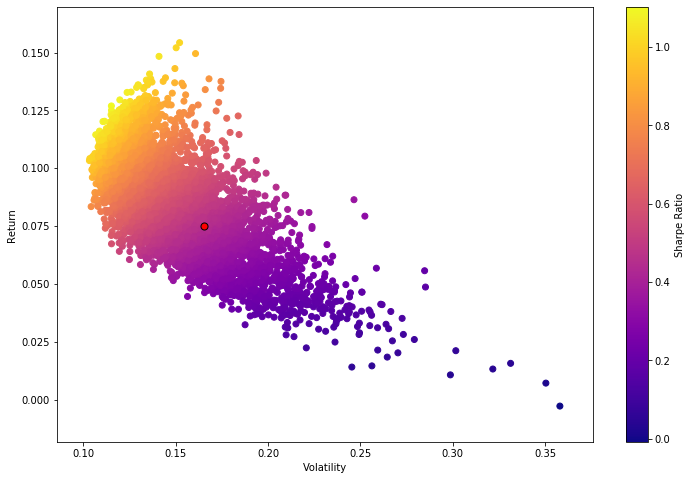

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');


#### Mathematical method based on the minimization of the negative sharpe :

In [105]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights)*252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [106]:
from scipy.optimize import minimize

##### Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [107]:
def neg_sharpe (weights):
    return get_ret_vol_sr(weights)[2] * -1

In [108]:
#Constrainte
def check_sum (weights):
    #Return 0 if some the weights is 1 :
    return np.sum(weights)-1

In [109]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun':check_sum})

In [110]:
# 0-1 bounds for each weight
bounds =((0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

In [111]:
# Initial Guess (equal distribution)
init_guess = [0.16,0.16,0.16,0.16,0.16,0.16]

In [112]:
# Sequential Least SQuares Programming (SLSQP)
opt_results = minimize(neg_sharpe , init_guess , method = 'SLSQP' , bounds=bounds, constraints = cons )

##### Those are the 'optimal' allocations : 

In [113]:
opt_results.x

array([0.37024731, 0.12303611, 0.23452127, 0.09054477, 0.18165053,
       0.        ])

##### In order from left to right : The Return,Volatility and sharpe ratio (Optimal) :  

In [114]:
get_ret_vol_sr(opt_results.x) #In order from left to right : The Return,Volatility and sharpe ratio (Optimal) 

array([0.13183714, 0.11831423, 1.11429655])

##### We obtain Almost the same results :
 - From the 'Random Allocations' method : 33% , 13% , 28% , 5% , 18% , 0.2% / Sharpe Ratio = 1.090
 - From the 'Mathematical' methode : 38 % , 12% , 23% , 9% , 18% , 0% / Sharpe Ratio = 1.1142


 

#### Efficient Frontier : We have to check all the optimal portfolios : 

In [115]:
frontier_y = np.linspace(0,0.16,100)

In [116]:
#Minimize volatility

In [117]:
def minimize_volatility (weights):
    return get_ret_vol_sr(weights)[1]

In [118]:
frontier_volatility = []
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun': check_sum}, {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])

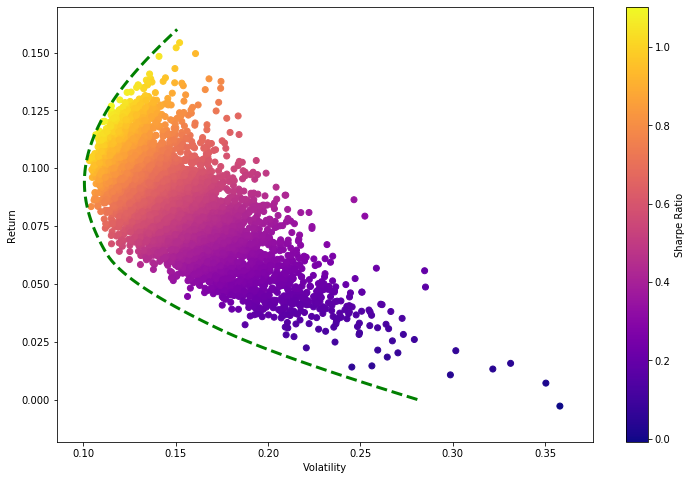

In [119]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--',linewidth = 3);

#### We can see from this plot for exemple that for a 0.15 volatility, the expected return will be approximately 0.16 according to historical data :

,Adj. Close
Date,
2018-03-13,2.06
2018-03-14,2.05
2018-03-15,2.05
2018-03-16,1.99
2018-03-19,2.03
...,...
2020-04-03,3.32
2020-04-06,3.23
2020-04-07,3.25
